# Adult Depression Rates in CA

## Introduction

In this notebook, I will be carrying out analysis on the data I found for adult depression rates in CA from 2012 to 2018. The overall questions I want to ask are: What are some of the historical trends for percentages of depression among adults in CA? How do different demographic categories (sex, age, race) affect various experiences of depression? More specifically, do males and females experience depression differently? How about young versus older age groups?

I will inspect the data, make initial observations, look at which specific demographic categories I am working with and which ones to focus on, and also make key interpretations about depression among different sexes, age groups, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Which groups of people report higher levels of depression within each category?
These observations make me think more about the differences in depression rates per year, and also the distribution of depression rates for each category of people. Within each category (e.g. sex, race, income level, etc), which groups of people are reporting higher levels of depression?

I will go into observing several more key characteristics about my data, including the total number of people who were told they had depression, and dig deeper into the columns we have, in order to determine which ones we can derive key analysis from:

In [2]:
depress_df = pd.read_csv('../data/Cleaned/depress_CLEANED.csv')

In [3]:
depress_df

,year,category,category_name,count,weighted_count,percent,lower_cl,upper_cl
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
...,...,...,...,...,...,...,...,...
156,2018,Age,18 to 34,496,1623933.0,17.69,13.72,21.66
157,2018,Age,35 to 44,285,749615.0,14.56,10.91,18.21
158,2018,Age,45 to 54,301,1052945.0,20.06,15.60,24.52
159,2018,Age,55 to 64,432,854201.0,21.44,17.65,25.23


In [4]:
depress_df.head()

,year,category,category_name,count,weighted_count,percent,lower_cl,upper_cl
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65


In [5]:
depress_df.sample(15)

,year,category,category_name,count,weighted_count,percent,lower_cl,upper_cl
46,2014,Total,Total,1309,NaN,13.30,12.29,14.31
100,2016,Education,No High School Diploma,208,381325.0,11.65,9.03,14.28
140,2018,Sex,Female,1206,3106910.0,21.96,19.08,24.84
109,2016,Income,"$100,000+",263,903030.0,12.08,9.41,14.75
121,2017,Race-Ethnicity,Asian/Pacific Islander,67,227004.0,6.76,4.41,9.10
134,2017,Age,35 to 44,209,1007265.0,19.53,14.71,24.34
75,2015,Race-Ethnicity,Asian/Pacific Islander,58,139702.0,3.97,2.60,5.34
23,2013,Total,Total,1689,NaN,13.08,12.33,13.82
96,2016,Race-Ethnicity,Black,91,203913.0,13.55,9.15,17.96
8,2012,Education,No High School Diploma,282,579047.0,14.43,12.60,16.26


In [6]:
depress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            161 non-null    int64  
 1   category        161 non-null    object 
 2   category_name   161 non-null    object 
 3   count           161 non-null    int64  
 4   weighted_count  154 non-null    float64
 5   percent         161 non-null    float64
 6   lower_cl        161 non-null    float64
 7   upper_cl        161 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 10.2+ KB


In [7]:
depress_df['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [8]:
# I want to find out how many categories there are for each year:

depress_df['year'].value_counts()

2018    23
2017    23
2016    23
2015    23
2014    23
2013    23
2012    23
Name: year, dtype: int64

In [9]:
depress_df['category'].unique()

array(['Total', 'Sex', 'Race-Ethnicity', 'Education', 'Income', 'Age'],
      dtype=object)

* To reiterate, we have information on each year from 2012 to 2018.
* It looks like we have data on 23 different categories (represented by 23 rows) for each year.

In [10]:
# Total people across all the years who had depression:

depress_df['count'].sum()

69194

In [11]:
# Percentage of people in each category is more meaningful
# data that allows us to make comparisons:

depress_df['percent'].mean()

14.789627329192541

* I think the percentages of depression among the diverse categories of people will give us a better idea into the rates of depression with adults in CA rather than the count, because the percentages give us proportion data, which we can use to make internal comparisons in our data and help with our analysis.

In [12]:
# What are the unique columns we have?

depress_df['category'].unique()

array(['Total', 'Sex', 'Race-Ethnicity', 'Education', 'Income', 'Age'],
      dtype=object)

* We have 6 categories, total for all the rows, Sex (M/F), Race-Ethnicity, Education, Income, and Age. I want to find out more information about specific levels under each category.
* Again, we know from the value_counts function above that for each year, there are 23 different category names. Let's find out what these groups are!

In [13]:
# Unique groups we have data on:

depress_df['category_name'].unique()

array(['Total', 'Male', 'Female', 'White', 'Black', 'Hispanic',
       'Asian/Pacific Islander', 'Other', 'No High School Diploma',
       'High School Graduate or GED Certificate',
       'Some College or Tech School', 'College Graduate or Post Grad',
       '< $20,000', '$20,000 - $34,999', '$35,000 - $49,999',
       '$50,000 - $74,999', '$75,000 - $99,999', '$100,000+', '18 to 34',
       '35 to 44', '45 to 54', '55 to 64', '65+ years'], dtype=object)

One thing to note is that we have a "Total" tab for all of the years. This will allow us to compare the Total amount of people across the categories who were told they had a depressive disorder.

In [14]:
# To get the percentages of people with depression for each category:


depress_df.groupby(['year','category','category_name'])['percent'].mean().to_frame()

percent
year category       category_name         
2012 Age            18 to 34          7.63
                    35 to 44         11.13
                    45 to 54         14.67
                    55 to 64         17.19
                    65+ years        12.63
...                                    ...
2018 Race-Ethnicity Other            26.04
                    White            21.54
     Sex            Female           21.96
                    Male             13.44
     Total          Total            17.78

[161 rows x 1 columns]

* This .groupby function is helpful in our analysis because it allows me to understand quickly which specific categories (across different income brackets, ages, race-ethnicities, and highest education level) had relatively high or low depression rates.
* One important thing to note here is that the percentages are based on dividing the amount of people in each separate category name by the Total amount of people who were told they had depression IN THAT YEAR. This means that the percentages are all based on that year's total count. 

Surveying the data above, some key observations that I want to include:

1) Females have higher depression rates than males (about 18% compared to 11%, respectively);

2) Depression rates seem to increase with age, before dropping off for 65+ years of age;

3) The race-ethnicity categorized as "Other" has the highest depression rates among the races, but this could be because races or ethnicities that are not part of the major ones (Asian, Black, Hispanic, White) are all grouped together into the "Other" category. 

4) Asian/Pacific Islanders reported the absolute lowest percentage of depression in this data frame.

There are lots of different category levels. I am particularly interested in the Sex and Age, because of my previous knowledge on learning in various Psych classes that on average, females tend to experience higher levels of depression than males. With age, I want to guess that younger generations, perhaps in the 18-24 age range, would experience higher depression rates, but let's find out! Before we go into any sex or age filters on our data set, first I want to start with historically, how depression rates have changed. Let's get into it:

## How have depression rates changed over the years?
Before I go into more specific categories, one question I want to ask is how many total people experienced depression in each year? 

To do this, I will take filter the rows by the total amount of people with depression, get the percentage of each of those rows, and plot them with a bar graph to display any historical trends in depression percentages from 2012 to 2018 in CA:

In [15]:
depress_df[depress_df['category']=='Total'][['year', 'count']]

,year,count
0,2012,1920
23,2013,1689
46,2014,1309
69,2015,1848
92,2016,1645
115,2017,1550
138,2018,1964


So here we have a small table showing us only the count columns for the "Total" category over the 7 years. Across all the different 22 categories we have (23 - 1 since "Total" is always included), 2018 had the highest amount of people who reported they were once told they have depressive disorder, closely followed by 2012 and then 2015, and the rest of the years falling behind that. 

In [16]:
depress_df[depress_df['category']=='Total'][['year', 'percent']]

,year,percent
0,2012,11.74
23,2013,13.08
46,2014,13.30
69,2015,12.92
92,2016,13.77
115,2017,19.04
138,2018,17.78


With this table, I wanted to look strictly at the depression percentages for the Total number of respondents throughout the years. It's increased overall, from 11.74% to 17.78%, and what's especially notable is that there was a big spike from 2016 to 2017 (13.77% up to 19.04%). Even though we see a slight decrease between the last two years, there's still an overall gradual uptrend. 

If I want to look at this on a plot, I'll go into creating a Total filter, so that we can visually show the differences in depression rates over the 7 years:

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <BarContainer object of 7 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018')])

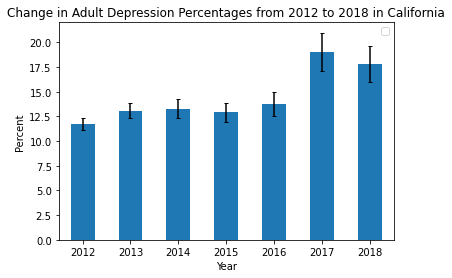

In [52]:
# Using the filter for Total adult depression percentages by row:

total_filter = depress_df['category']=='Total'

total_depress_df = depress_df[total_filter]

total_depress_df.plot(kind='bar',
                              x='year', 
                              y='percent',
                              yerr=((total_depress_df['upper_cl']-total_depress_df['percent'], 
                                     total_depress_df['percent']-total_depress_df['lower_cl']),
                                   ),
                              capsize=2,
                              label='_nolegend_'
                              )
plt.title('Change in Adult Depression Percentages from 2012 to 2018 in California')
plt.xlabel('Year')
plt.ylabel('Percent')

# Rotating the xticks for years so the labels are horizontal and easier to read:
plt.xticks(rotation=0, ha='center')

### Observations:

* The depression percentages range from around 11.5% to 17.5% from the first year to the last year.
* From this data and bar plot, if we look at the overall trends, it appears that depression rates have been increased from 2012 to 2018.
* It's important to note that 2017 reported the highest adult depression percentages, and I'm wondering if there might be a reason for that? Why was there a big jump from 2016 to 2017?

Now that we know some of the historical trends in adult depression percentages in CA, I am curious about more specific categories. Let's get into the sex and age filters!

## Are there differences in depression rates among males and females?

In [18]:
# Instead of the total filter, I want to do the same thing with the sex filter
# to determine if males and females experience different depression rates:

sex_filter = depress_df['category']=='Sex'

sex_depress_df = depress_df[sex_filter]

# To obtain 2 columns with depression percentages for females and males:

sex_grouped_df = sex_depress_df.groupby(['year','category_name'])['percent'].sum().unstack()

sex_grouped_df

category_name,Female,Male
year,,
2012,15.25,8.12
2013,16.52,9.53
2014,16.03,10.46
2015,16.01,9.73
2016,16.09,11.38
2017,23.33,14.61
2018,21.96,13.44


### Observations:

* From this table, it looks like for every single year, females reported higher depression percentages than males. 
* For both sexes, there was a bigger increase between 2016 and 2017 than between any other years, which is consistent with what we found earlier with the total depression percentages spiking in 2017.
* For females, the depression percentages range from 15.25% to 21.96%, whereas for males, the percentages range from 8.12% to 13.44%.
* These findings are consistent with my hypothesis that females experience higher depression rates than males.

Now, I want to put this information into a visual bar graph:

<AxesSubplot:xlabel='year'>

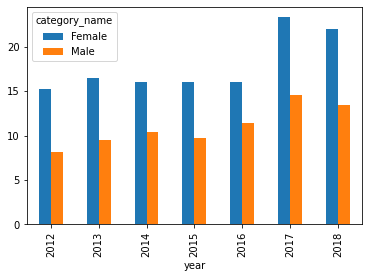

In [19]:
# To produce a grouped bar plot

sex_grouped_df.plot(kind='bar')

* We can clearly see from the higher blue bars that females experienced higher levels of depression than males for all 7 years. 

I am curious about the differences in depression rates among various age groups, so we will analyze that now:

## Are there differences in depression rates among age groups?
* Doing the same thing to plot the data, using an age filter this time:

In [20]:
# Creating a filter for age:

age_filter = depress_df['category'] == 'Age'
age_depress_df = depress_df[age_filter]

# To show the 5 columns for depression percentages by age bracket
# for each year from 2012 to 2018:

age_grouped = age_depress_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

age_grouped

category_name,18 to 34,35 to 44,45 to 54,55 to 64,65+ years
year,,,,,
2012,7.63,11.13,14.67,17.19,12.63
2013,9.96,10.42,16.81,18.39,13.41
2014,10.18,12.45,14.62,19.91,13.19
2015,9.81,14.21,13.27,16.99,13.85
2016,11.84,11.85,14.59,18.65,14.61
2017,19.80,19.53,16.40,22.32,16.94
2018,17.69,14.56,20.06,21.44,15.60


In [62]:
# To see the mean of depression rates among age group:

depress_mean = age_grouped.mean(axis=0)

depress_mean

category_name
18 to 34     12.415714
35 to 44     13.450000
45 to 54     15.774286
55 to 64     19.270000
65+ years    14.318571
dtype: float64

* There are a lot more numbers this time, so it might help us further to create a bar graph first before making our observations:

<AxesSubplot:xlabel='year'>

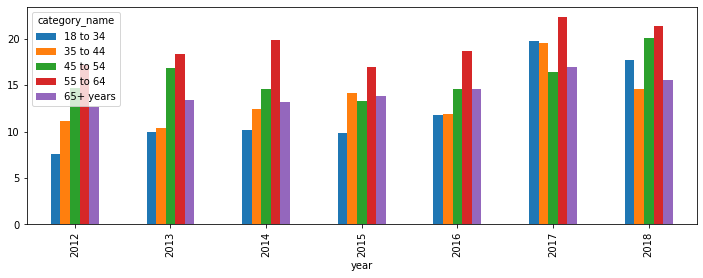

In [21]:
# To produce a grouped bar plot,
# grouped by each year and by each age bracket we have:

age_grouped.plot(kind='bar', figsize=(12,4))

### Observations:

* Depression percentages seem to increase as people get older in CA, and the data is consistent with the finding that depression rates are increasing overall throughout the years.
* The red bars for each year show us that the 55 to 64 age group reported the highest depression percentages for all 7 years.
* It is interesting to look at the 45 to 54 age group (green bar), which reported decreasing depression percentages from 2013 to 2016 before increasing again after that.
* Another important observation is that the youngest 18 to 34 age group reported a very big increase from 2016 to 2017, which might have contributed most to the big spike in overall depression rates that we observed earlier in our analysis during those two years.
* Also, one thing to note is that the 18 to 34, and 65+, age groups cover more people than the other, narrower age groups (35 to 44, 45 to 54, and 55 to 64 are all separated by 9 years). Then it is all the more interesting that despite the youngest and oldest age groups covering a wider amount of ages, the 55 to 64 age group still reported the highest depression rates in every year. This might have to do with the specific life stages that this age group experiences that might lead them to spending more time alone; something worth considering and researching later.

The bar plot is helpful in visualizing and making observations, but for my data story, I want it to be a little easier for the audience to comprehend. 

I think that a line plot might be better-suited for this, so I will do that below:

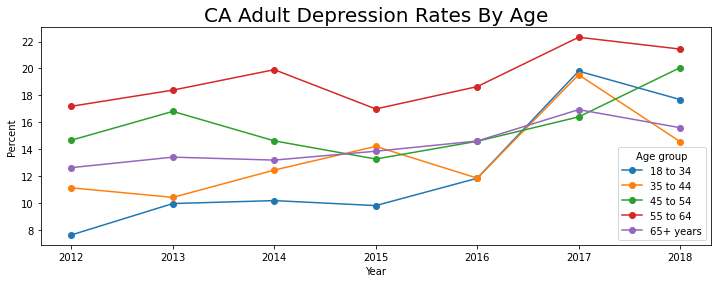

In [55]:
# Making a line plot, and labeling the plot title & axes:

age_grouped.plot(kind='line', figsize=(12,4), style='-o')
plt.title('CA Adult Depression Rates By Age', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend(title='Age group')

Much better way of visualizing the data! Clear and effective. I will be including this in my final data story for sure! :)

### Observations:

* Main point: Ages 55 to 64 report the highest rates of depression.
* Females report higher depression levels.
* What happened between 2016 to 2017 for the depression rates to spike more than the other years?

These findings lead me to look further into the first bullet point above: 55-64 year-olds. What is it about this age range? Could we perhaps find data from the same large survey to get an idea of the people in this age range?

I'm going to look into other potential factors that may help us understand what these individuals are going through. A lot of different factors are running through my mind: unemployment or income statistics, physical activity, divorce, etc! 

I have found several factors including adverse childhood experiences, proportion of current smokers, prevalence of diabetes, those meeting physical activity guidelines. These will be my next data_analysis notebooks. Let's get into that! Please refer to the first one, adverse childhood experiences. 

Thank you!